РК 1 Кабанец РТ5-61Б Вариант 11
Задача - 2, датасет - 3
Доп по варианту - для пары произвольных колонок данных построить график "Jointplot"

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import numpy as np
import seaborn as sns

In [2]:
# Загрузка данных
data = pd.read_csv('toy_dataset.csv')
print(data.head())

   Number    City Gender   Age   Income Illness
0       1  Dallas   Male   NaN  40367.0      No
1       2  Dallas   Male  54.0  45084.0      No
2       3  Dallas   Male   NaN  52483.0      No
3       4  Dallas   Male  40.0  40941.0      No
4       5  Dallas   Male   NaN  50289.0      No


In [3]:
# Проверка пропусков в данных
missing_values = data.isnull().sum()
print("Пропуски в данных:")
print(missing_values)

Пропуски в данных:
Number     0
City       0
Gender     0
Age        3
Income     0
Illness    0
dtype: int64


In [4]:
# Импутация пропущенных значений в колонке 'Age'
cat_temp_data = data[['Age']]
print(cat_temp_data.head())

    Age
0   NaN
1  54.0
2   NaN
3  40.0
4   NaN


In [5]:

# Проверка уникальных значений и пропусков
print(cat_temp_data['Age'].unique())
print(cat_temp_data[cat_temp_data['Age'].isnull()].shape)

[nan 54. 40. 36. 32. 39. 51. 30. 48. 47. 46. 42. 61. 43. 27. 38. 35. 57.
 33. 58. 64. 44. 34. 45. 55. 63. 41. 59. 26. 56. 62. 31. 49. 53. 29. 28.
 25. 37. 65. 60. 50. 52.]
(3, 1)


In [6]:
# Импутация наиболее частым значением
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data['Age'] = data_imp2

print(np.unique(data_imp2))
print(data.head())


[25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42.
 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54. 55. 56. 57. 58. 59. 60.
 61. 62. 63. 64. 65.]
   Number    City Gender   Age   Income Illness
0       1  Dallas   Male  26.0  40367.0      No
1       2  Dallas   Male  54.0  45084.0      No
2       3  Dallas   Male  26.0  52483.0      No
3       4  Dallas   Male  40.0  40941.0      No
4       5  Dallas   Male  26.0  50289.0      No


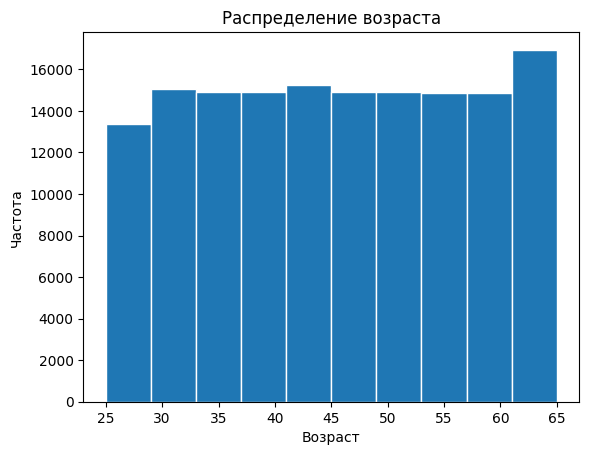

In [7]:

# Построение гистограммы распределения возраста
plt.hist(data['Age'], edgecolor='white')
plt.title('Распределение возраста')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show()


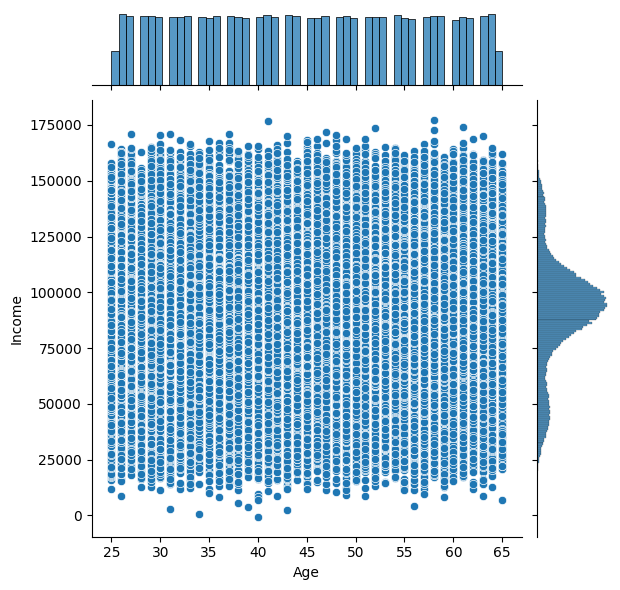

In [8]:
# Построение графика "Jointplot" для колонок ('Age' и 'Income')
sns.jointplot(x='Age', y='Income', data=data, kind='scatter')
plt.show()
